In [18]:
from IPython.display import clear_output

!pip  install -U ultralytics ray
clear_output()


In [19]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# download the kaggle dataset
!curl -L  -o  german-traffic-sign-detection.zip   https://www.kaggle.com/api/v1/datasets/download/pkdarabi/cardetection
!unzip german-traffic-sign-detection.zip -d ./kaggle/
clear_output()


In [ ]:
input_dir =  "./kaggle/car"

In [ ]:
!ls $input_dir

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid



image 1/1 /content/kaggle/car/valid/images/00003_00001_00000_png.rf.9ed87fda908a3a802ab6918948970e61.jpg: 640x640 (no detections), 11.0ms
Speed: 17.9ms preprocess, 11.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


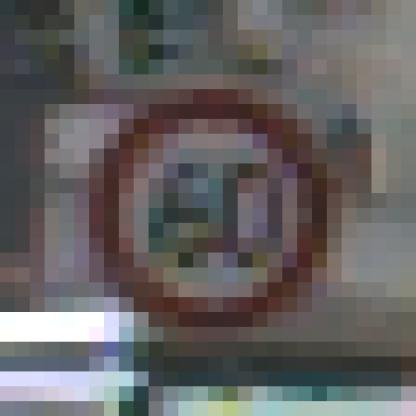

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = input_dir + "/valid/images/00003_00001_00000_png.rf.9ed87fda908a3a802ab6918948970e61.jpg"

result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


In [ ]:
# train the model on custom dataset
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data=input_dir+"/data.yaml",epochs = 300, batch = -1, optimizer = 'auto')
Final_model.save('trafic_sign_model.pt')  # Specify your desired save path
clear_output()

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./kaggle/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,